# DAPGEO-02 Well Logs

In [1]:
import lasio , os  
import numpy as np    
import pandas as pd   

import matplotlib as mpl  
import matplotlib.pyplot as plt

%matplotlib inline   

In [2]:
# This function converts null values to NaN
# E.g. null = -9999.25 > Type <print(lasfile.well)> to find out this value
def valtonan(inp, val=-99999.000000):
    """Convert all 'val' to NaN's."""
    inp[inp==val] = np.nan
    return inp

#This function makes for cleaner axis plotting
def remove_last(ax, which='upper'):
    """Remove <which> from x-axis of <ax>.
    which: 'upper', 'lower', 'both'
    """
    nbins = len(ax.get_xticklabels())
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=nbins, prune=which))

#This function smoothes the curves for better visualization
def smooth(data, window_len=10):
    """Smooth the data using a window with requested size."""
    s_p = np.r_[2*data[0]-data[window_len:1:-1],
                data, 2*data[-1]-data[-1:-window_len:-1]]
    w_p = np.ones(window_len, 'd')
    y_p = np.convolve(w_p/w_p.sum(), s_p, mode='same')
    return y_p[window_len-1:-window_len+1]


## Logging Phase 2 [0 - 200 m depth]
LAS files version 3 cannot be read by the _lasio_ package. Therefore, measurements were saved in independent _CSV_ files because depth sampling varies between measurements. 
__Note__: These are raw measurements and data must be cleaned to filter/remove data outliers, e.g. gamma ray.

In [3]:
# LAS files from phase 2 are version 3 and cannot be read by lasio. 
#p2 = lasio.read(os.path.join("logs/DAPGEO-02_500m_PHASE2_RES_IP_SGR.las"))

In [4]:
p2_kut = pd.read_csv('../data/interim/phase2_GR_K_U_T.csv')
p2_kut

,DEPTH.M,GR.API,K.%,U.PPM,TH.PPM
0,42.5016,57.9220,0.374637,2.536620,0.000000
1,42.5515,74.0309,0.394387,1.645930,5.337020
2,42.6014,54.7021,0.229890,2.685000,0.000000
3,42.6513,54.4915,1.111340,0.000000,0.884902
4,42.7012,54.8499,0.844439,0.000000,1.505940
...,...,...,...,...,...
3721,228.2000,105.6880,0.693402,0.000000,15.399100
3722,228.2500,101.5200,0.526911,1.178930,8.456170
3723,228.3000,99.4096,1.207060,2.953820,1.303200
3724,228.3500,97.4727,0.815284,0.810538,4.242170


Calculating predefined aggregated statistics allows to spot outliers. Indeed, the minimum value in gamma ray of -99999.000000 is an invalid measurement, which can also be seen in the plot as spikes.

In [5]:
p2_kut[['GR.API','K.%','U.PPM','TH.PPM']].describe()

,GR.API,K.%,U.PPM,TH.PPM
count,3726.000000,3726.000000,3726.000000,3726.000000
mean,-303.243237,0.367906,0.913498,2.429941
std,5899.935151,0.398040,1.245371,3.016934
min,-99999.000000,0.000000,0.000000,0.000000
25%,30.262975,0.000000,0.000000,0.000000
50%,38.537700,0.258015,0.270104,1.341070
75%,54.498625,0.578825,1.550358,4.007132
max,138.384000,2.985270,10.135700,20.594600


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

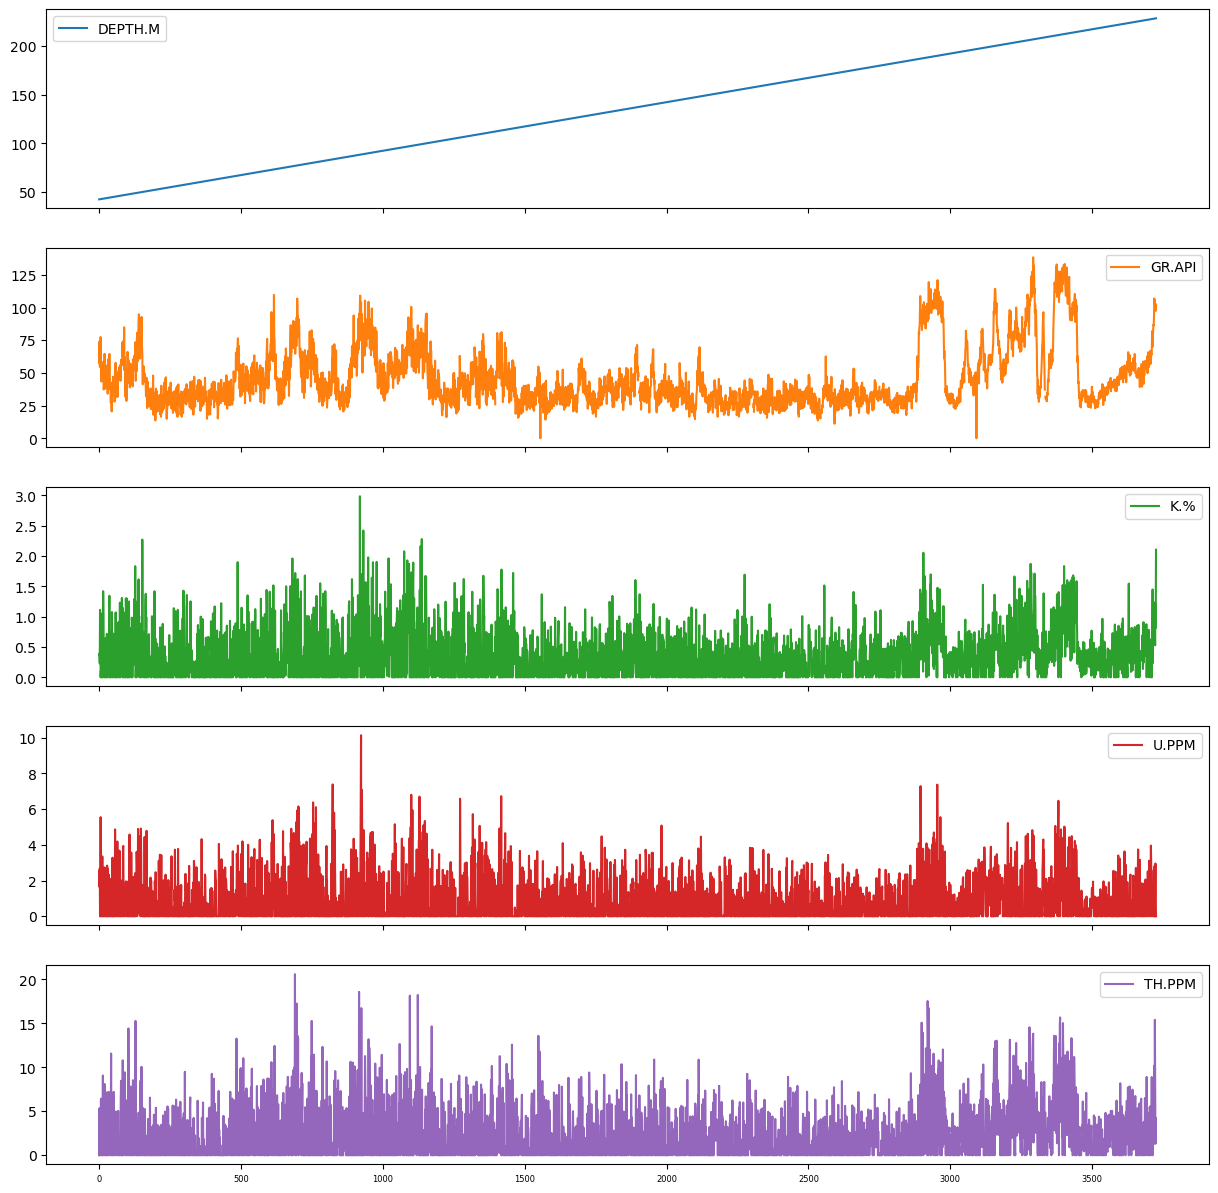

In [45]:
p2_kut.plot(subplots=True, figsize=(15, 15))

## Gamma Ray correction
We convert it to a NaN number using the funciton valtonan and plot it.

In [7]:
p2_kut['GR.API']=valtonan(p2_kut['GR.API'])

In [8]:
names=p2_kut.keys()
names

Index(['DEPTH.M', 'GR.API', 'K.%', 'U.PPM', 'TH.PPM'], dtype='object')

## Smoothing logs

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

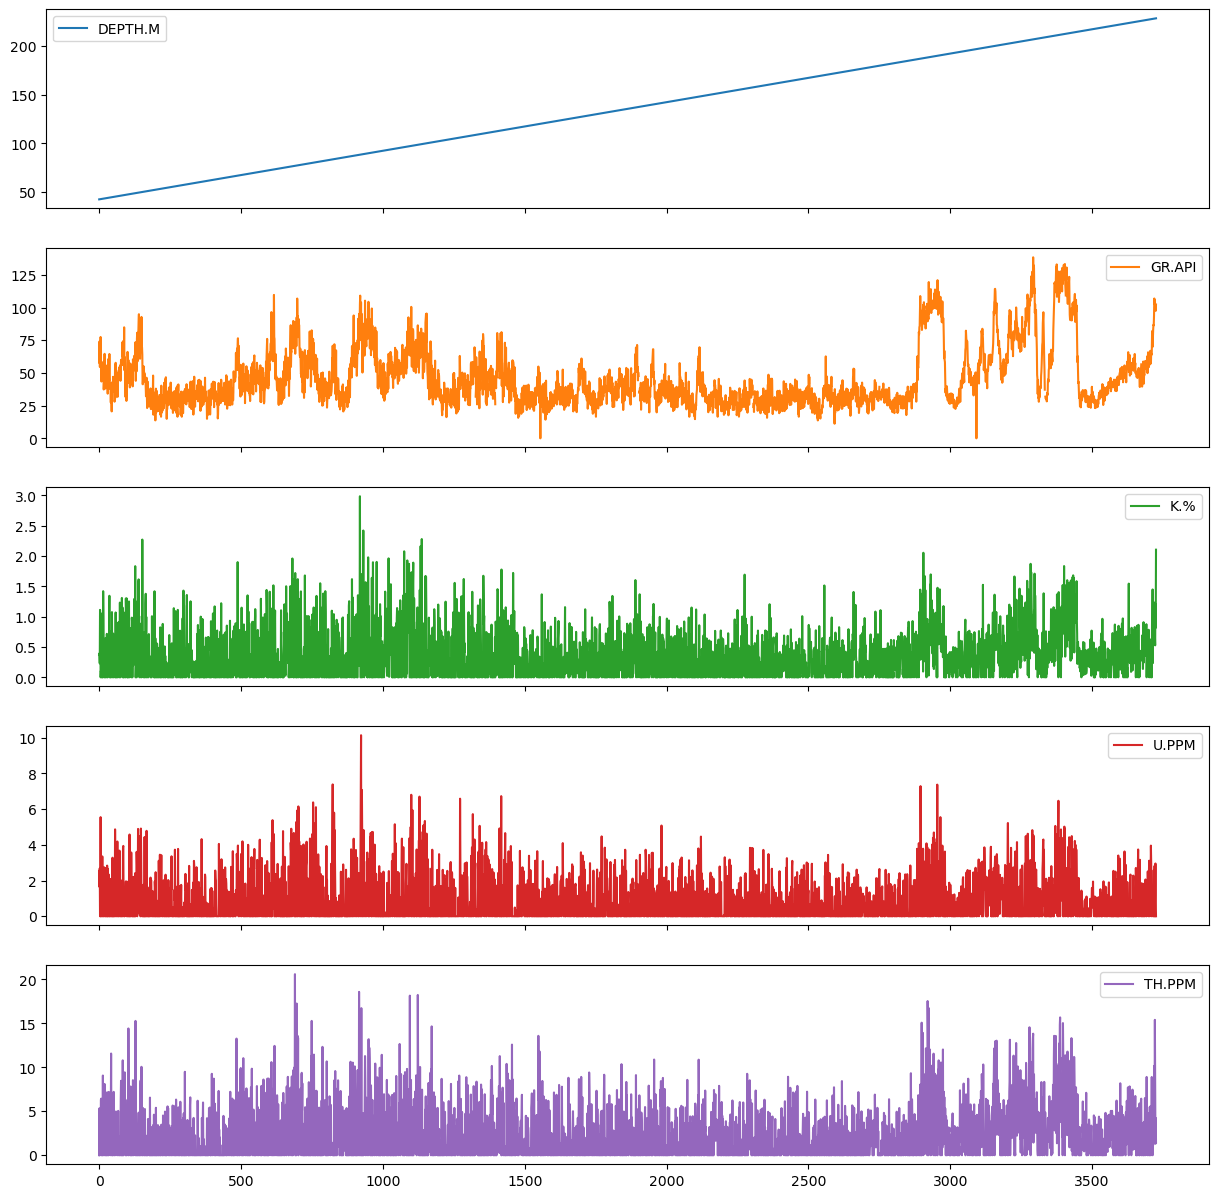

In [9]:
k = smooth(p2_kut['K.%'].values, window_len=5)
u = smooth(p2_kut['U.PPM'].values, window_len=10)
t = smooth(p2_kut['TH.PPM'].values, window_len=10)
p2_kut.plot(subplots=True, figsize=(15, 15))

/tmp/ipykernel_377/4039274918.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)


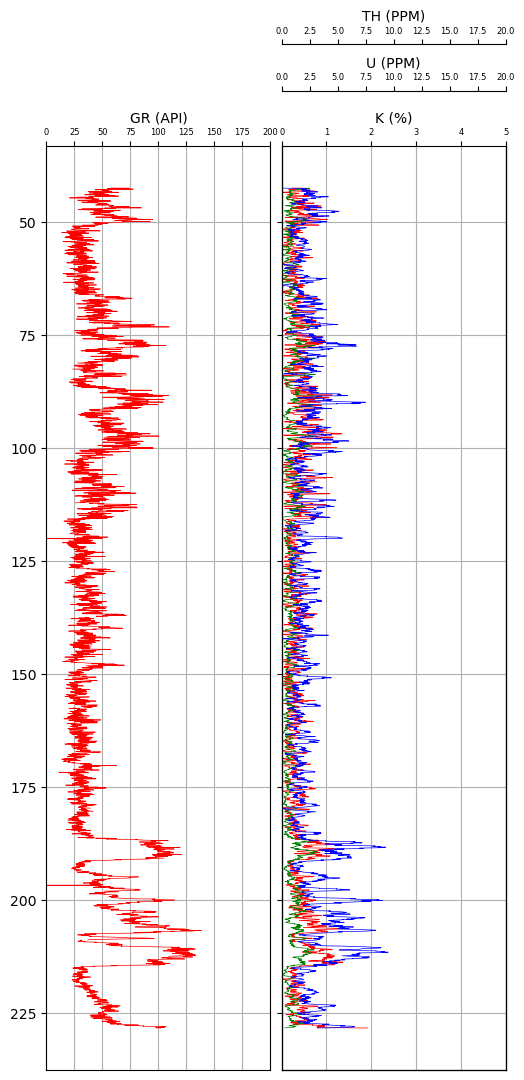

In [42]:
f0, ax1 = plt.subplots(figsize=(12,12),)
#Reduce the space between each subplot
f0.subplots_adjust(wspace = 0.05)
ax1 = plt.gca()
ax1.invert_yaxis()

#curve_names = ['Gamma', 'Deep Res', 'Density', 'Neutron']
#Set up the plot axes
ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
#ax3 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1)
#ax4 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1)
ax3 = ax2.twiny()
ax4 = ax2.twiny()

#Set up the individual log tracks / subplots

ax1.plot(p2_kut['GR.API'], p2_kut['DEPTH.M'], color = "red", lw = 0.5)
ax1.set_xlim(0, 200)
ax1.set_xlabel('GR (API)')
ax1.invert_yaxis()

ax2.plot(k, p2_kut['DEPTH.M'], color = "red", lw = 0.5)
ax2.set_xlim(0, 5)
ax2.set_xlabel('K (%)')

ax3.plot(u, p2_kut['DEPTH.M'], color = "green", lw = 0.5)
ax3.set_xlim(0, 20)
ax3.set_xlabel('U (PPM)')

ax4.plot(t, p2_kut['DEPTH.M'], color = "blue", lw = 0.5)
ax4.set_xlim(0, 20)
ax4.set_xlabel('TH (PPM)')

#Set up the common elements between the subplots
for i, ax in enumerate(f0.axes):
    #ax.set_ylim(0, 250) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    
    if i >= 2:
        ax.spines["top"].set_position(("axes", 0.96+(i/20)))
    else:
        ax.grid()

#Hide tick labels on the y-axis 
for ax in [ax2, ax3, ax4]:
    plt.setp(ax.get_yticklabels(), visible = False)
axs = plt.gca()
axs.invert_yaxis()

## Logging Phase 3 [233.173 - 423.593 m depth]

In [44]:
p3_kut = pd.read_csv('../data/interim/phase3_K_U_T.csv')
p3_gr = pd.read_csv('../data/interim/phase3_GR.csv')
print(p3_gr)
print(p3_kut)

      DEPTH.M    GR.API
0     233.173   74.1766
1     233.273   72.5798
2     233.372   69.4213
3     233.472   69.3420
4     233.572   69.1301
...       ...       ...
1903  423.113   21.6485
1904  423.213   22.6395
1905  423.313   23.7289
1906  423.413   72.7249
1907  423.513  145.8840

[1908 rows x 2 columns]
      DEPTH.M       K.%     U.PPM    TH.PPM
0     233.153  0.914693  0.510505  4.749720
1     233.253  0.883348  0.459324  4.887240
2     233.352  0.445724  0.688102  5.191870
3     233.452  0.539342  1.268090  1.463200
4     233.552  0.723970  1.504480  2.497730
...       ...       ...       ...       ...
1904  423.193  0.145569  1.167480  0.953067
1905  423.293  0.485174  0.115369  0.334245
1906  423.393  0.140097  0.833496  1.223390
1907  423.493  0.278782  0.619181  0.948470
1908  423.593  0.194170  1.316120  0.000000

[1909 rows x 4 columns]


In [53]:
p3_gr[['GR.API']].describe()

,GR.API
count,1908.000000
mean,86.131828
std,27.929663
min,18.654700
25%,75.075200
50%,86.864350
75%,97.220325
max,191.598000


In [54]:
p3_kut[['K.%','U.PPM','TH.PPM']].describe()

,K.%,U.PPM,TH.PPM
count,1909.000000,1909.000000,1909.000000
mean,0.661788,1.707235,4.691090
std,0.289063,1.172098,2.460745
min,0.000000,0.000000,0.000000
25%,0.467340,0.815569,2.828000
50%,0.643873,1.548580,4.651880
75%,0.825576,2.345000,6.423100
max,2.306060,6.686190,14.181300


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

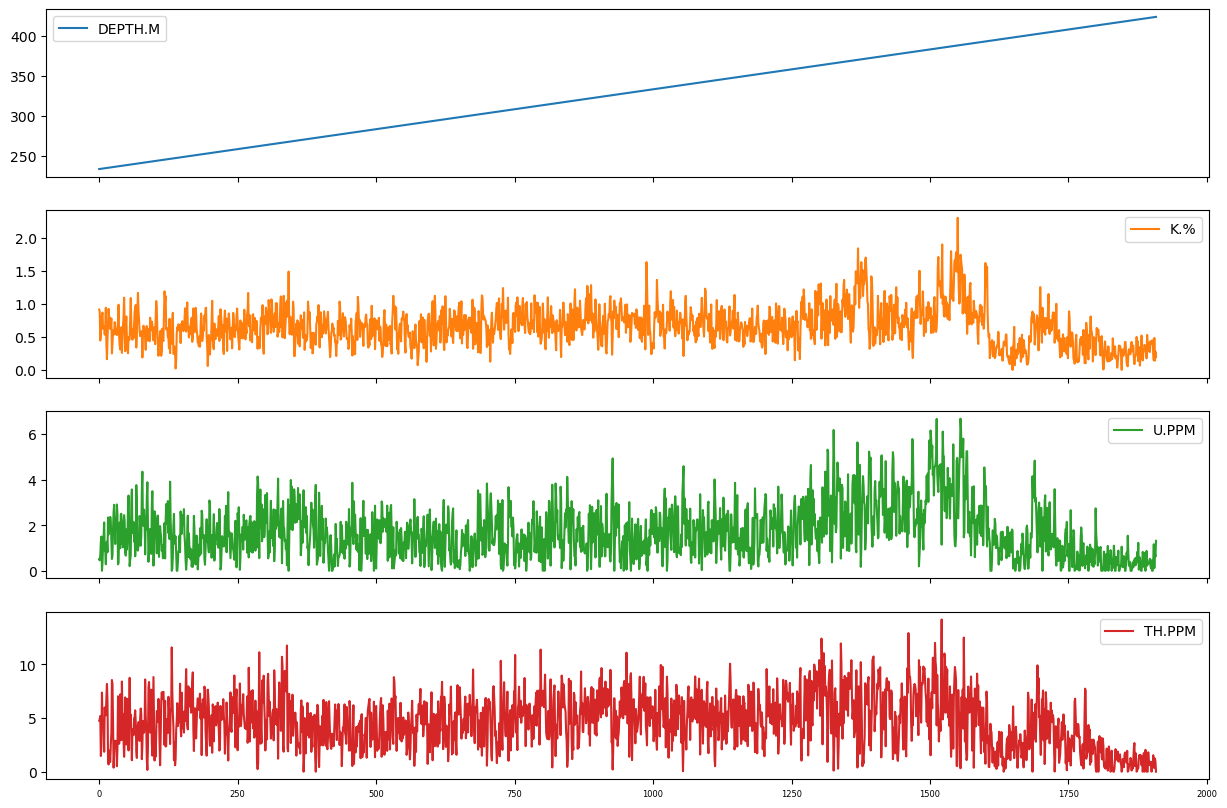

In [56]:
p3_kut.plot(subplots=True, figsize=(15, 10))

In [ ]:
k = smooth(p2_kut['K.%'].values, window_len=5)
u = smooth(p2_kut['U.PPM'].values, window_len=10)
t = smooth(p2_kut['TH.PPM'].values, window_len=10)
p2_kut.plot(subplots=True, figsize=(15, 15))

/tmp/ipykernel_377/2553789685.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)


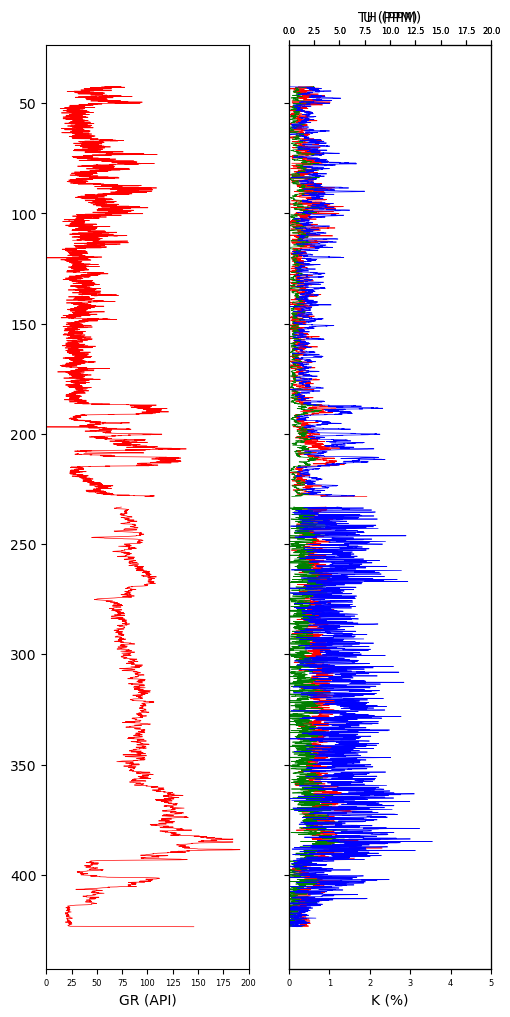

In [61]:
f1, ax1 = plt.subplots(figsize=(12,12))
#Reduce the space between each subplot
f0.subplots_adjust(wspace = 0.05)
ax1 = plt.gca()
ax1.invert_yaxis()

#curve_names = ['Gamma', 'Deep Res', 'Density', 'Neutron']
#Set up the plot axes
ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
#ax3 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1)
#ax4 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1)
ax3 = ax2.twiny()
ax4 = ax2.twiny()

#Set up the individual log tracks / subplots

#ax1.plot(p2_kut['GR.API'], p2_kut['DEPTH.M'], color = "red", lw = 0.5)
ax1.plot(p2_kut['GR.API'], p2_kut['DEPTH.M'], color = "red", lw = 0.5)
ax1.plot(p3_gr['GR.API'], p3_gr['DEPTH.M'], color = "red", lw = 0.5)
ax1.set_xlim(0, 200)
ax1.set_xlabel('GR (API)')
ax1.invert_yaxis()

ax2.plot(k, p2_kut['DEPTH.M'], color = "red", lw = 0.5)
ax2.plot(p3_kut['K.%'], p3_kut['DEPTH.M'], color = "red", lw = 0.5)
ax2.set_xlim(0, 5)
ax2.set_xlabel('K (%)')

ax3.plot(u, p2_kut['DEPTH.M'], color = "green", lw = 0.5)
ax3.plot(p3_kut['U.PPM'], p3_kut['DEPTH.M'], color = "green", lw = 0.5)
ax3.set_xlim(0, 20)
ax3.set_xlabel('U (PPM)')

ax4.plot(t, p2_kut['DEPTH.M'], color = "blue", lw = 0.5)
ax4.plot(p3_kut['TH.PPM'], p3_kut['DEPTH.M'], color = "blue", lw = 0.5)
ax4.set_xlim(0, 20)
ax4.set_xlabel('TH (PPM)')

#Set up the common elements between the subplots
for i, ax in enumerate(f0.axes):
    #ax.set_ylim(0, 250) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    
    if i >= 2:
        ax.spines["top"].set_position(("axes", 0.96+(i/20)))
    else:
        ax.grid()

#Hide tick labels on the y-axis 
for ax in [ax2, ax3, ax4]:
    plt.setp(ax.get_yticklabels(), visible = False)
axs = plt.gca()
axs.invert_yaxis()

## Resistivity and SGR Logs
to do

## Phase 3


In [11]:
# Load LAS files from phase 3 (.las version 2)
p3_vpvs = lasio.read(os.path.join('../data/raw/DAPGEO-02_500m_PHASE3_VPVS_processed.las'))

In [12]:
print(p3_vpvs.curves)

Mnemonic        Unit  Value  Description     
--------        ----  -----  -----------     
DEPT            M            DEPTH           
V_P-WAVE_SONIC  M/S          V P-wave Sonic  
V_P-WAVE_PS     M/S          V P-wave PS     
V_S-WAVE_PS_1   M/S          V S-wave PS_1   
V_S-WAVE_PS_2   M/S          V S-wave PS_2   


In [13]:
p3_vpvs.keys() 

['DEPT', 'V_P-WAVE_SONIC', 'V_P-WAVE_PS', 'V_S-WAVE_PS_1', 'V_S-WAVE_PS_2']

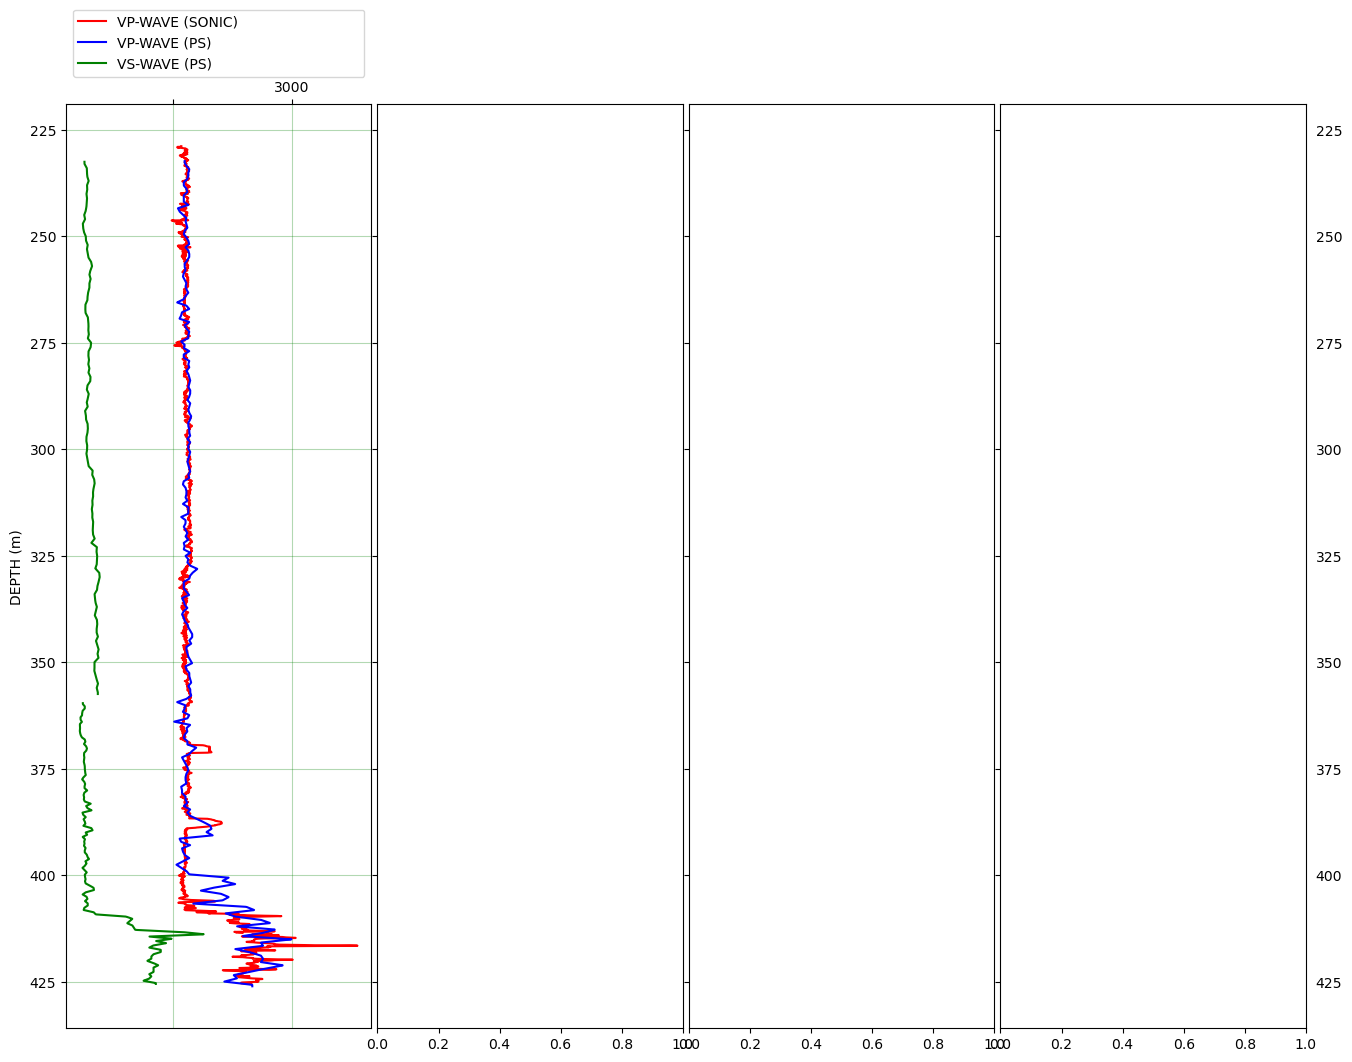

In [14]:
# Plotting Velocity curves along well total depth

f2, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,12))
f2.subplots_adjust(wspace=0.02)
plt.gca().invert_yaxis()

# So that y-tick labels appear on left and right
plt.tick_params(labelright=True)

# Change tick-label globally
mpl.rcParams['xtick.labelsize'] = 10

ax1.plot(p3_vpvs['V_P-WAVE_SONIC'], p3_vpvs['DEPT'],'r', label='VP-WAVE (SONIC)')
ax1.plot(p3_vpvs['V_P-WAVE_PS'], p3_vpvs['DEPT'],'b', label='VP-WAVE (PS)')
ax1.plot(p3_vpvs['V_S-WAVE_PS_1'], p3_vpvs['DEPT'], 'g', label='VS-WAVE (PS)')
ax1.plot(p3_vpvs['V_S-WAVE_PS_2'], p3_vpvs['DEPT'], 'g')
ax1.xaxis.tick_top()
#ax1.xaxis.set_label_position('top') 
#ax1.set_xlabel()
ax1.set_ylabel('DEPTH (m)')
ax1.grid(True, c="g", alpha=0.3)
ax1.legend(bbox_to_anchor=(0.,1.1,1.,0.01), mode="expand")
plt.setp(ax1.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax1)  # remove last value of x-ticks, see function defined in first cell

plt.show()


## Phase 4

In [15]:
# Load LAS files from phase 4
p4_vs = lasio.read(os.path.join('../data/raw/DAPGEO-02_500m_PHASE4_VS_processed.las'))
print(p4_vs.curves)

Mnemonic     Unit  Value  Description  
--------     ----  -----  -----------  
DEPT         M            DEPTH        
GR           API          GR           
V_S-WAVE_PS  M/S          V S-wave PS  


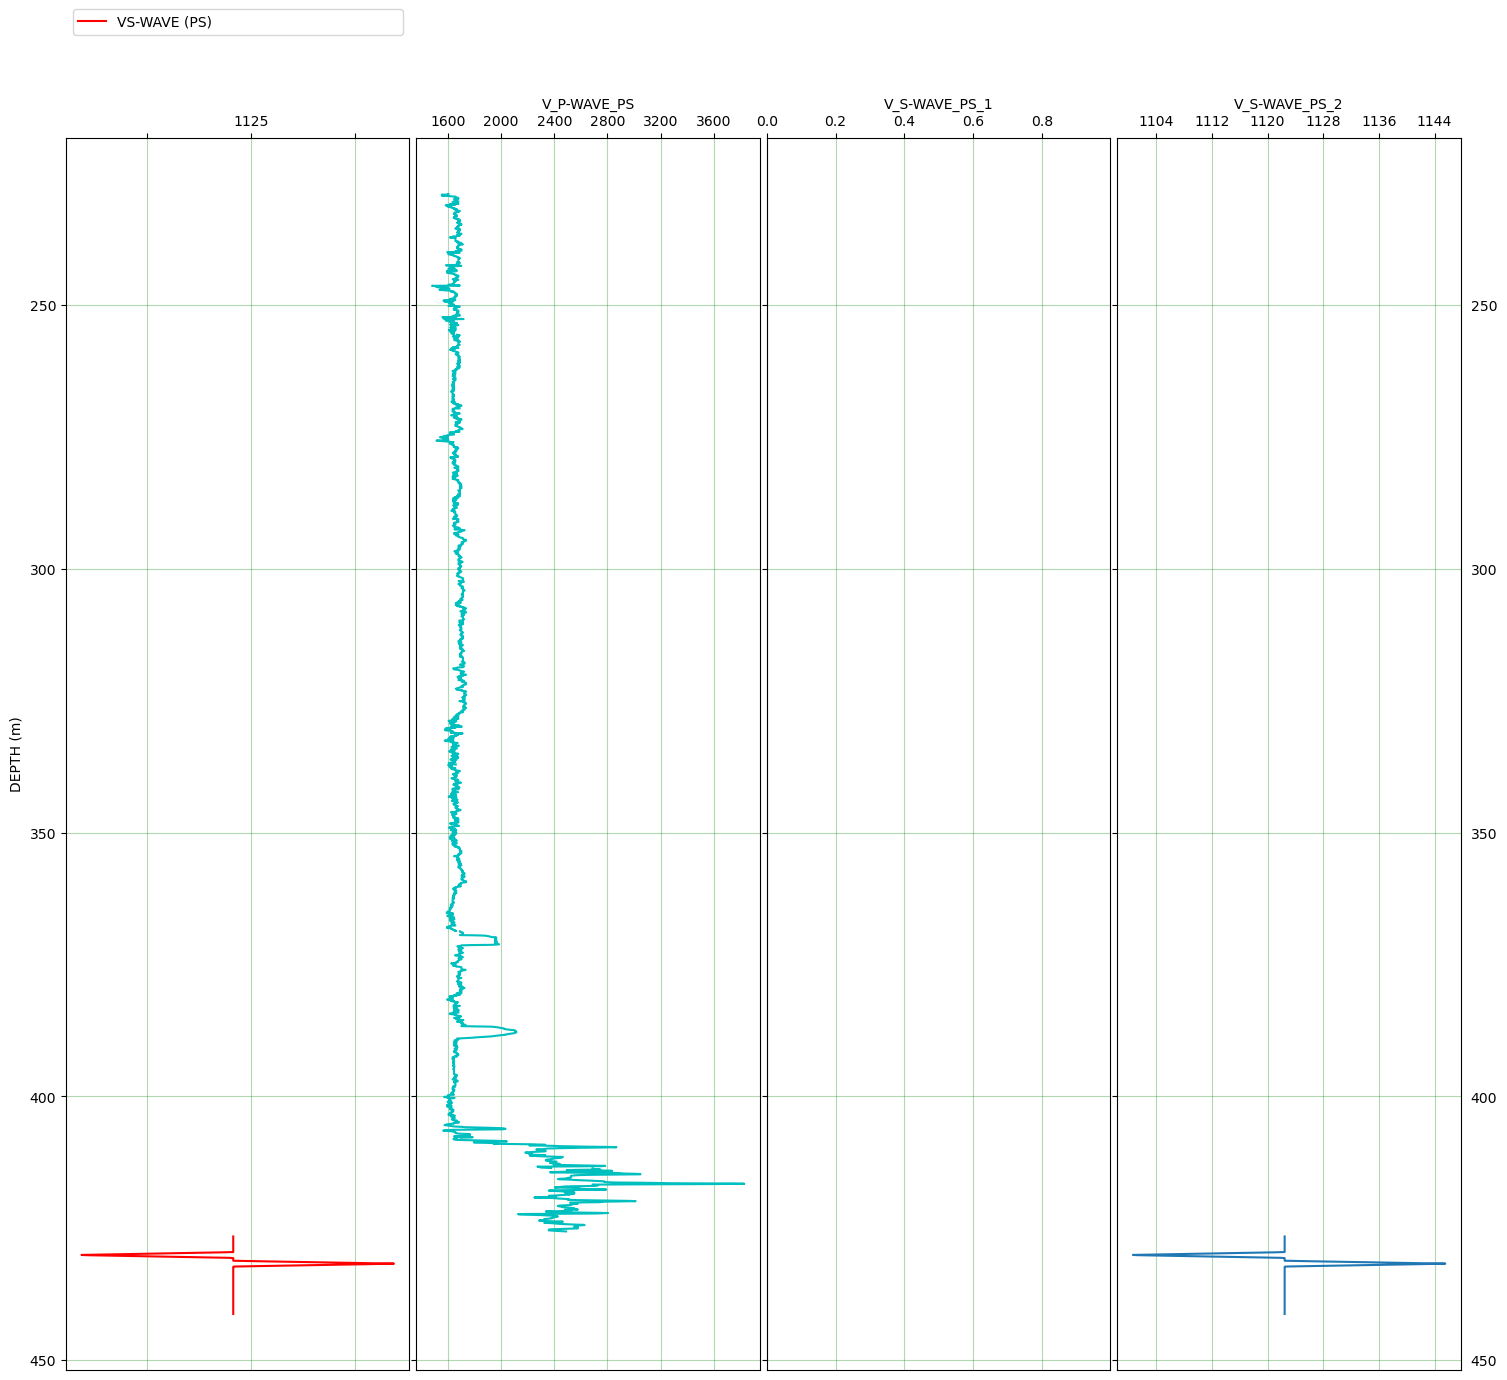

In [16]:
# Plotting curves along well total depth

f3, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(18,16))
f3.subplots_adjust(wspace=0.02)
plt.gca().invert_yaxis()

# So that y-tick labels appear on left and right
plt.tick_params(labelright=True)

# Change tick-label globally
mpl.rcParams['xtick.labelsize'] = 10

ax1.plot(p4_vs['V_S-WAVE_PS'], p4_vs['DEPT'],'r', label='VS-WAVE (PS)')
ax1.xaxis.tick_top()
#ax1.xaxis.set_label_position('top') 
#ax1.set_xlabel()
ax1.set_ylabel('DEPTH (m)')
ax1.grid(True, c="g", alpha=0.3)
ax1.legend(bbox_to_anchor=(0.,1.1,1.,0.01), mode="expand")
plt.setp(ax1.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax1)  # remove last value of x-ticks, see function defined in first cell

ax2.plot(p3_vpvs['V_P-WAVE_SONIC'], p3_vpvs['DEPT'],'c', label='')
ax2.set_xlabel('V_P-WAVE_PS',va = 'top')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.grid(True, c="g", alpha=0.3)
remove_last(ax2)  


ax3.set_xlabel('V_S-WAVE_PS_1',va = 'top')
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')
ax3.grid(True, c="g", alpha=0.3) 
remove_last(ax3) 


ax4.plot(p4_vs['V_S-WAVE_PS'], p4_vs['DEPT'])
ax4.set_xlabel('V_S-WAVE_PS_2')
ax4.xaxis.tick_top()
ax4.xaxis.set_label_position('top')
ax4.grid(True, c="g", alpha=0.3) 
remove_last(ax4)  

plt.show()


In [17]:
p4_kut = lasio.read(os.path.join('../data/raw/DAPGEO-02_500m_PHASE4_SGR.las'))

In [18]:
p4_kut.keys() 

['DEPT',
 'TIME_ENC',
 'SPEED_ENC',
 'TENSION_TEN',
 'ETIME_SGR',
 'K_SGR',
 'U_SGR',
 'TH_SGR',
 'KTH_SGR',
 'GAMMA_SGR',
 'GRS_SGR']